In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1['area_type']


0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [5]:
df1['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape


(13320, 5)

In [8]:
df2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3['size'].unique()


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# Use .loc to explicitly set the new column in df3
df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


C:\Users\kambl\AppData\Local\Temp\ipykernel_17936\3323630638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df3.bhk.unique()


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df3[df3.bhk>20]


,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
df3.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3['total_sqft'].apply(is_float)].head(10)


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_to_num('2100 - 2850')
convert_sqft_to_num('34.46Sq. Meter')

In [18]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [19]:
df4 = df4[df4.total_sqft.notnull()]
df4


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [20]:
df4.loc[30]


location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [21]:
(2100+2850)/2


2475.0

In [22]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [24]:
df5.to_csv("bhp.csv",index=False)

In [25]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats


location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [26]:
len(location_stats[location_stats<=10])


1047

In [27]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10


location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [28]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())


241

In [29]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [30]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape


(12456, 7)

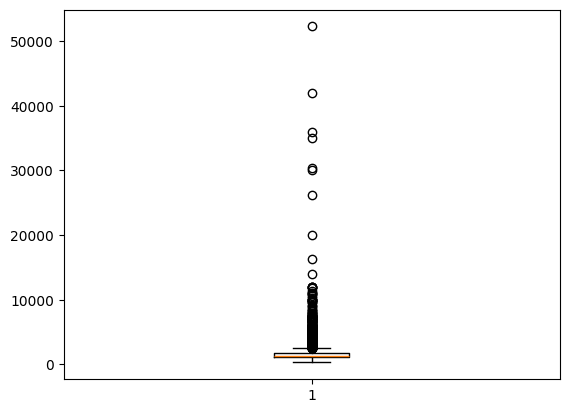

In [31]:
plt.boxplot(df6['total_sqft'])
plt.show()

In [32]:
# Calculate IQR and identify outliers
Q1 = np.percentile(df6['total_sqft'], 25.)
Q3 = np.percentile(df6['total_sqft'], 75.)
IQR = Q3 - Q1
ll = Q1 - (1.5 * IQR)
ul = Q3 + (1.5 * IQR)

# Get the indices of outliers
upper_outliers = df6[df6['total_sqft'] > ul].index.tolist()
lower_outliers = df6[df6['total_sqft'] < ll].index.tolist()
bad_indices = list(set(upper_outliers + lower_outliers))
drop=True

# Drop outliers using .loc
if drop:
    df6 = df6.loc[~df6.index.isin(bad_indices)]


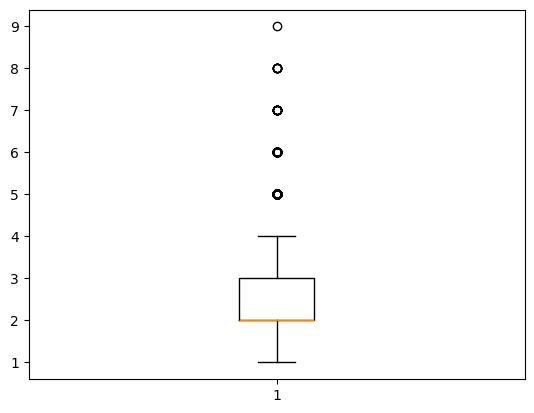

In [33]:
plt.boxplot(df6['bath'])
plt.show()


In [34]:
Q1 = np.percentile(df6['bath'], 25.)
Q3 = np.percentile(df6['bath'], 75.)
IQR = Q3-Q1
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['bath'] > ul].index.tolist()
lower_outliers = df6[df6['bath'] < ll].index.tolist()
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True

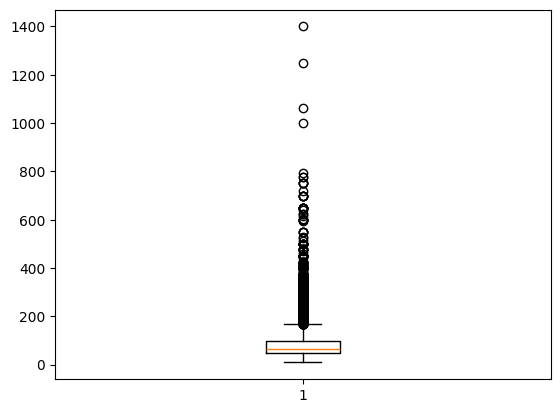

In [35]:
plt.boxplot(df6['price'])
plt.show()


In [36]:
Q1 = np.percentile(df6['price'], 25.) # 25th percentile of the data of the given fe
Q3 = np.percentile(df6['price'], 75.) # 75th percentile of the data of the given fe
IQR = Q3-Q1 #Interquartile Range
ll = Q1 - (1.5*IQR)
ul = Q3 + (1.5*IQR)
upper_outliers = df6[df6['price'] > ul].index.tolist()
lower_outliers = df6[df6['price'] < ll].index.tolist()
bad_indices = list(set(upper_outliers + lower_outliers))
drop = True
if drop:
    df6.drop(bad_indices, inplace = True, errors = 'ignore')


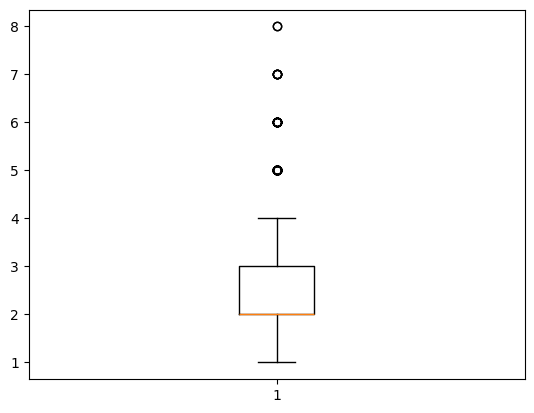

In [37]:
plt.boxplot(df6['bhk'])
plt.show()

In [38]:
X = df6.drop(['price'],axis='columns')
X.head(3)


,location,size,total_sqft,bath,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,3,6245.890861


In [39]:
y = df6.price
from sklearn.model_selection import train_test_split
y.head(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train.shape

(8411, 6)

In [41]:
y_train.shape


(8411,)

In [42]:
X_test.shape

(2103, 6)

In [43]:
y_test.shape

(2103,)